In [1]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd

# Load the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Display first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Step 2: Handle missing values and normalize data

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Replace zeros with NaN in selected columns
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Fill missing values with mean of each column
df[zero_columns] = df[zero_columns].fillna(df.mean())

# Normalize the data using Min-Max Scaler (scale to range [0,1])
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Separate features and target
X = df_scaled.drop('Outcome', axis=1)
y = df['Outcome']

# Display first 5 rows after preprocessing
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [3]:
# Step 3: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (614, 8)
Testing features shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


In [4]:
# Step 4: Train the Logistic Regression model

from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print model intercept and coefficients (optional)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-4.54345509]
Coefficients: [[ 0.98259212  4.10122272 -0.10419165  0.8658524   0.15606188  2.85192552
   1.00695867  1.53067422]]


In [5]:
# Step 5.1: Evaluate model using Accuracy

from sklearn.metrics import accuracy_score

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7792207792207793


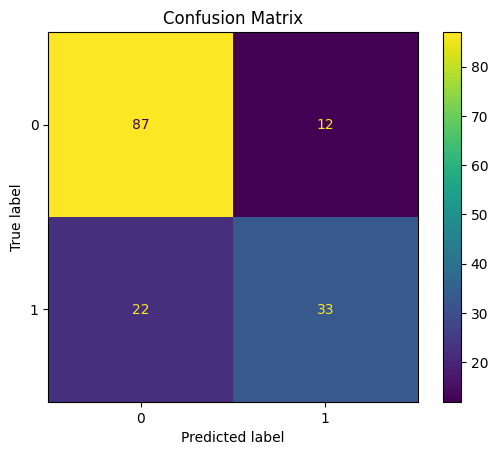

Confusion Matrix Values:
[[87 12]
 [22 33]]


In [6]:
# Step 5.2: Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Also print the matrix values
print("Confusion Matrix Values:")
print(cm)

In [7]:
# Step 5.3: Calculate Precision, Recall, F1-Score

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [8]:
# Step 5.4: Calculate ROC-AUC Score

from sklearn.metrics import roc_auc_score

# Get predicted probabilities for class 1 (diabetic)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8225895316804408


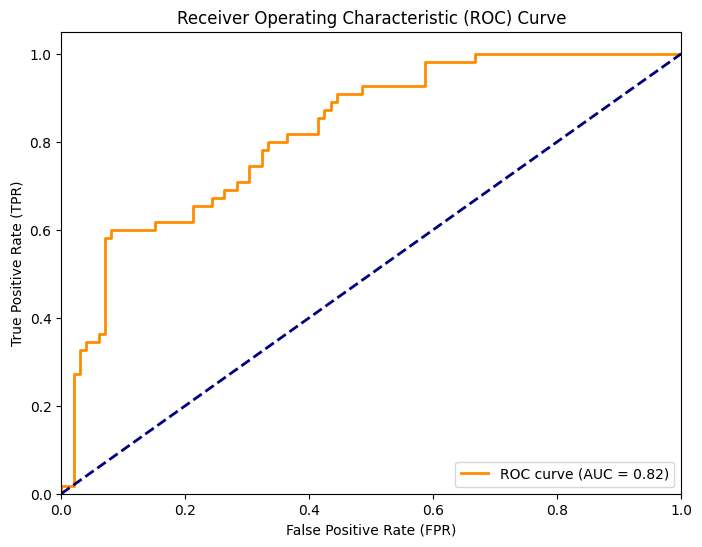

In [9]:
# Step 5.4: Plot ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1 (diabetic)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<div style = "direction : rtl;">
# گزارش پروژه: تشخیص دیابت با استفاده از رگرسیون لجستیکی

## 🎯 هدف:
هدف این پروژه، طبقه‌بندی افراد به دو دسته "دارای دیابت" و "بدون دیابت" با استفاده از الگوریتم **رگرسیون لجستیکی (Logistic Regression)** است. در این پروژه از دیتاست معروف **Pima Indians Diabetes Dataset** استفاده شده است.

---

## 📊 دیتاست:
- **منبع**: Pima Indians Diabetes Dataset
- **تعداد ردیف**: 768
- **تعداد ستون**: 9
- **ویژگی‌ها**:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age
  - Outcome (برچسب: 0 = بدون دیابت، 1 = دارای دیابت)

---

## 🛠️ پیش‌پردازش داده‌ها:
1. **حذف مقادیر غیرمنطقی**:
   - مقادیر صفر در برخی ستون‌ها (مانند `Glucose`, `BloodPressure`) به عنوان داده‌های گمشده در نظر گرفته شدند.
   - جایگزینی با میانگین همان ستون.

2. **نرمال‌سازی داده‌ها**:
   - تمام ویژگی‌ها با استفاده از `MinMaxScaler` به محدوده `[0,1]` نرمال شدند.

---

## ⚙️ تقسیم داده‌ها:
- **train/test split**: 80% آموزش / 20% تست
- استفاده از `random_state=42` برای تکرارپذیری نتایج
- **داده‌های آموزشی**: `(614, 8)`
- **داده‌های تست**: `(154, 8)`

---

## 📈 آموزش مدل:
- از مدل `LogisticRegression()` از کتابخانه `scikit-learn` استفاده شد.
- مدل با استفاده از داده‌های آموزشی فیت شد.
- ضرایب (`coef_`) و عرض از مبدأ (`intercept_`) مدل محاسبه شدند.

---

## 📊 نتایج ارزیابی مدل:

| معیار | مقدار |
|-------|--------|
| **Accuracy (دقت کلی)** | 0.7792 |
| **ROC-AUC Score** | 0.8226 |
| **Precision (کلاس 1)** | 0.73 |
| **Recall (کلاس 1)** | 0.60 |
| **F1-Score (کلاس 1)** | 0.66 |

---

## 🧮 ماتریس اشتباه (Confusion Matrix):

   
|                | Predicted 0 | Predicted 1 |
|----------------|-------------|-------------|
| **Actual 0**   | TN = 87     | FP = 12     |
| **Actual 1**   | FN = 22     | TP = 33     |

- **TN (True Negative)**: 87 نفر بدون دیابت درست تشخیص داده شدند.
- **FP (False Positive)**: 12 نفر بدون دیابت اشتباه تشخیص داده شدند.
- **FN (False Negative)**: 22 نفر دارای دیابت اشتباه تشخیص داده شدند.
- **TP (True Positive)**: 33 نفر دارای دیابت درست تشخیص داده شدند.

---

## 📉 نقاط قوت و ضعف:

### ✅ نقاط قوت:
- **دقت خوب (77.9%)**
- **AUC بالا (0.82)** → نشان دهنده توانایی خوب در جدا کردن دو کلاس
- **Precision منطقی (73%)** → از بین افرادی که مدل گفت "دارای دیابت"، 73% واقعاً دیابت داشتند.

### ❌ نقاط ضعف:
- **Recall پایین (60%)** → مدل فقط 60% از افراد واقعاً دارای دیابت را تشخیص داده است.
- **False Negative بالا (22)** → مدل زیادی از افراد بیمار را "سلامت" تشخیص داده است، که این می‌تواند مشکل بزرگی باشد.

---

## 📈 نمودار ROC Curve:
نمودار ROC Curve نشان می‌دهد که مدل ما **به خوبی** می‌تواند دو کلاس را از هم جدا کند.  
با AUC = 0.82، مدل ما عملکرد بهتری نسبت به حد تصادفی دارد.

---

## 💡 نتیجه‌گیری:
مدل لجستیک رگرسیون در مجموع عملکرد خوبی در تشخیص دیابت داشت، ولی هنوز اتاق بهتر شدن وجود دارد:
- می‌توانیم از روش‌های **مقابله با عدم تعادل داده** (مانند SMOTE، Class Weighting) استفاده کنیم.
- می‌توانیم از مدل‌های دیگر مثل **Random Forest**, **XGBoost** یا **Neural Networks** استفاده کنیم.
- می‌توانیم **Hyperparameter Tuning** انجام دهیم تا بهترین تنظیمات مدل را پیدا کنیم.

<\div>